<a href="https://colab.research.google.com/github/kanhaz-spec/MACHINE-LEARNING/blob/main/_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path ='/content/drive/MyDrive/Machine Learning/ObesityDataSet_raw_and_data_sinthetic.csv'


In [4]:
df=pd.read_csv(file_path)


In [5]:
print(df.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [6]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
                X[col] = le.fit_transform(X[col])

                y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
        )


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
def evaluate_svm(kernel_type):
   print(f"\n==== Kernel: {kernel_type} ====")
   model = SVC(kernel=kernel_type, C=1.0, gamma='scale', random_state=42)
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)

   cm = confusion_matrix(y_test, y_pred)
   acc = accuracy_score(y_test, y_pred)
   prec = precision_score(y_test, y_pred, average='weighted')
   rec = recall_score(y_test, y_pred, average='weighted')
   f1 = f1_score(y_test, y_pred, average='weighted')

   print("Confusion Matrix:\n", cm)
   print(f"Accuracy: {acc:.4f}")
   print(f"Precision: {prec:.4f}")
   print(f"Recall: {rec:.4f}")
   print(f"F1 Score: {f1:.4f}")

   return model, acc, prec, rec, f1

In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
    model, acc, prec, rec, f1 = evaluate_svm(k)
    results[k] = [acc, prec, rec, f1]


==== Kernel: linear ====
Confusion Matrix:
 [[54  0  0  0  0  0  0]
 [ 5 48  0  0  0  5  0]
 [ 0  0 68  0  0  0  2]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  3  0  0  0 54  1]
 [ 0  0  1  0  0  4 53]]
Accuracy: 0.9480
Precision: 0.9495
Recall: 0.9480
F1 Score: 0.9477

==== Kernel: poly ====
Confusion Matrix:
 [[51  1  0  0  0  2  0]
 [ 5 37  4  0  0  6  6]
 [ 0  1 65  2  0  0  2]
 [ 0  0  4 56  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  9 10  0  0 35  4]
 [ 1  2 17  0  0  1 37]]
Accuracy: 0.8156
Precision: 0.8242
Recall: 0.8156
F1 Score: 0.8127

==== Kernel: rbf ====
Confusion Matrix:
 [[50  4  0  0  0  0  0]
 [ 3 43  1  0  0  9  2]
 [ 0  2 65  1  0  0  2]
 [ 0  2  1 57  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0 10  1  0  0 43  4]
 [ 0  5  4  1  0  2 46]]
Accuracy: 0.8700
Precision: 0.8736
Recall: 0.8700
F1 Score: 0.8710

==== Kernel: sigmoid ====
Confusion Matrix:
 [[21 32  0  0  0  1  0]
 [24 22  0  0  0  9  3]
 [ 1  0 33 12  0  9 15]
 [ 0  0 13 47  0  0  0]
 [ 0  0  0  1 64  0 

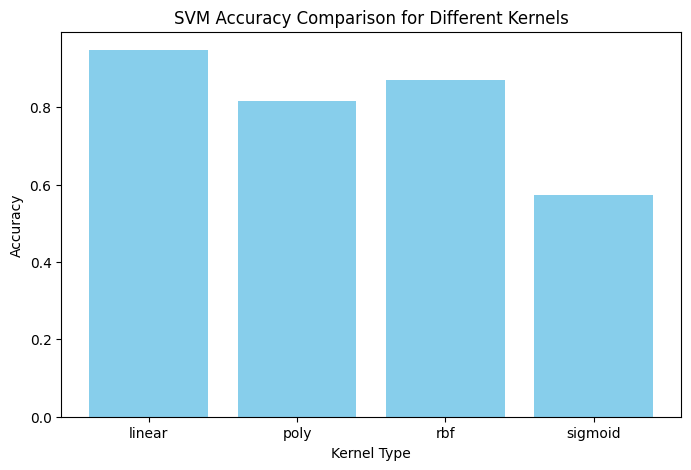

In [12]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), [v[0] for v in results.values()], color='skyblue')
plt.title('SVM Accuracy Comparison for Different Kernels')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show()

In [13]:
print("\n===== 5-Fold Cross Validation =====")
cv_results = {}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in kernels:
    model = SVC(kernel=k, C=1.0, gamma='scale', random_state=42)
    acc = cross_val_score(model, X, y, cv=skf, scoring='accuracy').mean()
    prec = cross_val_score(model, X, y, cv=skf, scoring='precision_weighted').mean()
    rec = cross_val_score(model, X, y, cv=skf, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted').mean()
    cv_results[k] = [acc, prec, rec, f1]
    print(f"\nKernel: {k}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")


===== 5-Fold Cross Validation =====

Kernel: linear
Accuracy: 0.8754, Precision: 0.8785, Recall: 0.8754, F1: 0.8733

Kernel: poly
Accuracy: 0.6011, Precision: 0.6080, Recall: 0.6011, F1: 0.5896

Kernel: rbf
Accuracy: 0.6040, Precision: 0.6079, Recall: 0.6040, F1: 0.5917


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Kernel: sigmoid
Accuracy: 0.0388, Precision: 0.1107, Recall: 0.0388, F1: 0.0178


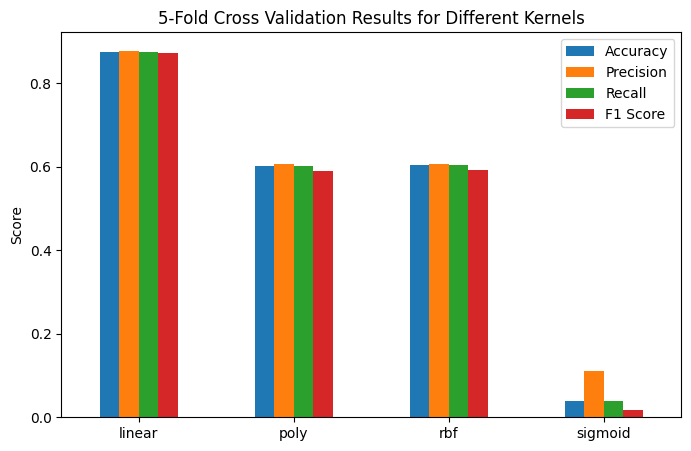

In [14]:
cv_df = pd.DataFrame(cv_results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
cv_df.T.plot(kind='bar', figsize=(8,5))
plt.title('5-Fold Cross Validation Results for Different Kernels')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [15]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
print("\nFirst 5 Support Vectors (RBF kernel):\n")
print(svm_rbf.support_vectors_[:5])


First 5 Support Vectors (RBF kernel):

[[-1.01311923 -0.51797083 -1.93656174 -1.71045422 -2.14661907  0.36973009
   1.08020206 -2.17793762 -1.85604788 -0.1497019  -1.66053699 -0.22010726
  -1.20444323 -1.08911463 -0.52477628  0.50050071]
 [-1.01311923 -0.64742967 -1.02537014 -1.60826955 -2.14661907 -2.70467575
   1.08020206  0.2653114  -1.85604788 -0.1497019  -1.66053699  4.54323955
  -0.29602349 -1.08911463 -0.52477628  0.50050071]
 [-1.01311923 -0.79780655 -1.42534363 -1.71297411 -2.14661907  0.36973009
  -0.67547842 -2.17793762  0.29870372 -0.1497019  -0.55623382 -0.22010726
  -1.20444323  1.77318643 -0.52477628  0.50050071]
 [-1.01311923 -1.13363493 -0.57478733 -1.41851213 -2.14661907  0.36973009
   1.08020206  1.13268133  0.29870372 -0.1497019  -0.94540822 -0.22010726
   1.15592849  0.57645383 -0.52477628  0.50050071]
 [-1.01311923 -0.20213259 -1.24630382 -1.61920514 -2.14661907 -2.70467575
  -0.42234141 -0.72291548 -1.85604788 -0.1497019   0.16691897 -0.22010726
  -0.02929086 -1